In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,silhouette_samples
from sklearn.decomposition import PCA
import warnings
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

In [2]:
data_file = os.path.join(os.getcwd(), "datasets", "spotify_data.csv")
df = pd.read_csv(data_file)
df.head(5)

,Title,Artists,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence,Song URL
0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",0.668,0.758,-5.176,0.033,0.483,0.000,0.834,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,WHERE SHE GOES,Bad Bunny,0.652,0.800,-4.019,0.061,0.143,0.629,0.234,https://open.spotify.com/track/7ro0hRteUMfnOio...
2,La Bebe - Remix,"Yng Lvcas, Peso Pluma",0.812,0.479,-5.678,0.333,0.213,0.000,0.559,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
3,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,-8.332,0.033,0.435,0.000,0.726,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
4,un x100to,"Grupo Frontera, Bad Bunny",0.569,0.724,-4.076,0.047,0.228,0.000,0.562,https://open.spotify.com/track/6pD0ufEQq0xdHSs...


In [3]:
print(f"The shape of the data is {df.shape}")

The shape of the data is (7801, 10)


In [4]:
# Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             7801 non-null   object 
 1   Artists           7801 non-null   object 
 2   Danceability      7801 non-null   float64
 3   Energy            7801 non-null   float64
 4   Loudness_fixed    7801 non-null   float64
 5   Speechiness       7801 non-null   float64
 6   Acousticness      7801 non-null   float64
 7   Instrumentalness  7801 non-null   float64
 8   Valence           7801 non-null   float64
 9   Song URL          7801 non-null   object 
dtypes: float64(7), object(3)
memory usage: 609.6+ KB


In [5]:
# Check if our dataset has null values
df.isnull().sum()

Title               0
Artists             0
Danceability        0
Energy              0
Loudness_fixed      0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
Song URL            0
dtype: int64

In [6]:
# Print Columns that exist in our datasets
df.columns.tolist()

['Title',
 'Artists',
 'Danceability',
 'Energy',
 'Loudness_fixed',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Valence',
 'Song URL']

In [7]:
# Statistics of our data - We can see that there's a lot of variation in the magnitude of the data e.g
# danceability and energy have higher values compared to other features e.g instrumentalness, speechness
df.describe()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
count,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000
mean,0.674994,0.635718,-5.829709,0.131199,0.236025,0.014107,0.487765
std,0.148479,0.171966,3.179626,0.120004,0.249982,0.083961,0.226527
min,0.073000,0.005000,-34.475000,0.022000,0.000000,0.000000,0.026000
25%,0.582000,0.530000,-7.428000,0.045000,0.041000,0.000000,0.311000
50%,0.692000,0.651000,-5.751000,0.077000,0.141000,0.000000,0.485000
75%,0.784000,0.761000,-4.194000,0.188000,0.355000,0.000000,0.661000
max,0.985000,0.996000,1.509000,0.966000,0.994000,0.956000,0.978000


In [8]:
most_frequent = df['Title'].value_counts().head(10)
most_frequent

Title
Intro          9
Alone          5
Heaven         5
Sleigh Ride    5
Paradise       4
Miss You       4
Run            4
All Night      4
Moonlight      4
Ruway          4
Name: count, dtype: int64

In [9]:
numerical_features = ['Danceability',	'Energy',	'Loudness_fixed',	'Speechiness', 	'Acousticness',	'Instrumentalness',	'Valence']
X = df[numerical_features].copy()
X.head()

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
0,0.668,0.758,-5.176,0.033,0.483,0.000,0.834
1,0.652,0.800,-4.019,0.061,0.143,0.629,0.234
2,0.812,0.479,-5.678,0.333,0.213,0.000,0.559
3,0.783,0.592,-8.332,0.033,0.435,0.000,0.726
4,0.569,0.724,-4.076,0.047,0.228,0.000,0.562


In [10]:
# Check to see if we have any missing values in our numerical features
X.isnull().sum()

Danceability        0
Energy              0
Loudness_fixed      0
Speechiness         0
Acousticness        0
Instrumentalness    0
Valence             0
dtype: int64

In [11]:
# We don't need this but this is still important to handle any missing values in case our dataset is tampered
if X.isnull().sum().any():
    print("Handling missing values")
    X = X.fillna(X.mean())
else:
    print("Our spotify dataset has no null values in the numerical features")

Our spotify dataset has no null values in the numerical features


In [12]:
# Remove variation in the magnitude of our data by standardising it

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)
X_scaled_df

,Danceability,Energy,Loudness_fixed,Speechiness,Acousticness,Instrumentalness,Valence
0,-0.047111,0.711128,0.205606,-0.818356,0.988031,-0.168023,1.528552
1,-0.154877,0.955379,0.569509,-0.585014,-0.372151,7.324001,-1.120313
2,0.922787,-0.911393,0.047716,1.681729,-0.092114,-0.168023,0.314489
3,0.727460,-0.254243,-0.787027,-0.818356,0.796005,-0.168023,1.051756
4,-0.713915,0.513402,0.551581,-0.701685,-0.032106,-0.168023,0.327733
...,...,...,...,...,...,...,...
7796,0.363749,1.467142,0.932782,-0.076664,-0.476165,-0.168023,1.378449
7797,-0.181819,0.583187,-0.666250,-0.768354,-0.768205,-0.168023,-0.484586
7798,-1.468280,1.531112,1.018647,0.006672,-0.936227,-0.168023,-0.837768
7799,-1.535634,1.234522,-0.108602,0.756698,-0.812211,-0.168023,-0.012205


In [14]:
# Print our standardised data to confirm that our variables are of the same magnitude
print("Scaled Data Statistics:")
print(X_scaled_df.describe())

Scaled Data Statistics:
       Danceability        Energy  Loudness_fixed   Speechiness  Acousticness  \
count  7.801000e+03  7.801000e+03    7.801000e+03  7.801000e+03  7.801000e+03   
mean   6.922349e-16  6.193681e-17   -8.015352e-17  1.384470e-16  4.372010e-17   
std    1.000064e+00  1.000064e+00    1.000064e+00  1.000064e+00  1.000064e+00   
min   -4.054674e+00 -3.667934e+00   -9.009590e+00 -9.100253e-01 -9.442282e-01   
25%   -6.263551e-01 -6.148032e-01   -5.026986e-01 -7.183522e-01 -7.802062e-01   
50%    1.145389e-01  8.887089e-02    2.475571e-02 -4.516764e-01 -3.801525e-01   
75%    7.341958e-01  7.285746e-01    5.144673e-01  4.733550e-01  4.759623e-01   
max    2.088011e+00  2.095214e+00    2.308189e+00  6.956908e+00  3.032305e+00   

       Instrumentalness       Valence  
count      7.801000e+03  7.801000e+03  
mean      -1.093003e-17 -2.186005e-16  
std        1.000064e+00  1.000064e+00  
min       -1.680229e-01 -2.038586e+00  
25%       -1.680229e-01 -7.803755e-01  
50%   

In [15]:
def get_cluster_inertias(X_scaled, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    return inertias

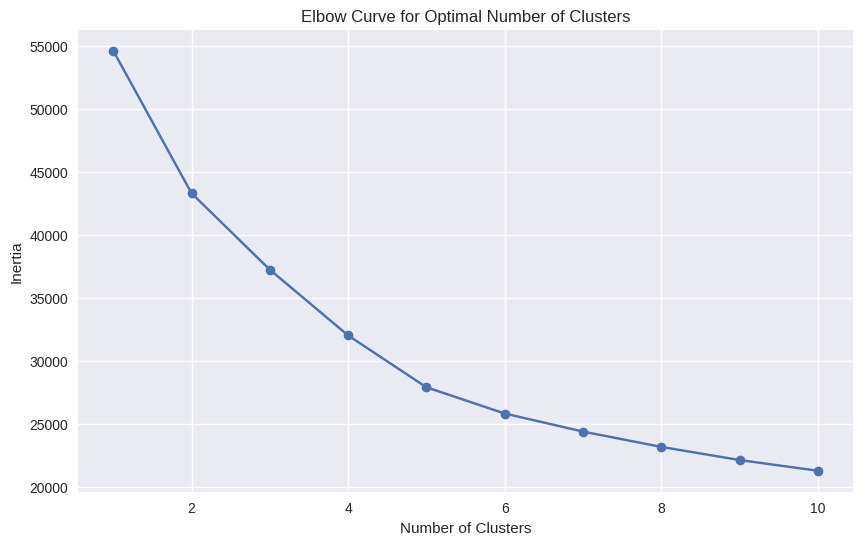

In [16]:
# Plot our elbow curve that will help us find optimal k
max_k = 10
inertias = get_cluster_inertias(X_scaled, max_k)
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.grid(True)
plt.show()   

In [61]:
# From Elbow curve, there is a constant decrease in inertia between 5 and 7, so we can choose any K between 5 and 7
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42) # K-Means++ to initialize the centroids vs random centroids
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels
X_scaled_df['Cluster'] = cluster_labels

print(f"Clustering completed with {n_clusters} clusters")
print("\nSong distribution in each cluster:")
print(df['Cluster'].value_counts().sort_index())

Clustering completed with 5 clusters

Song distribution in each cluster:
Cluster
0    2312
1    1282
2     898
3    1671
4    1638
Name: count, dtype: int64


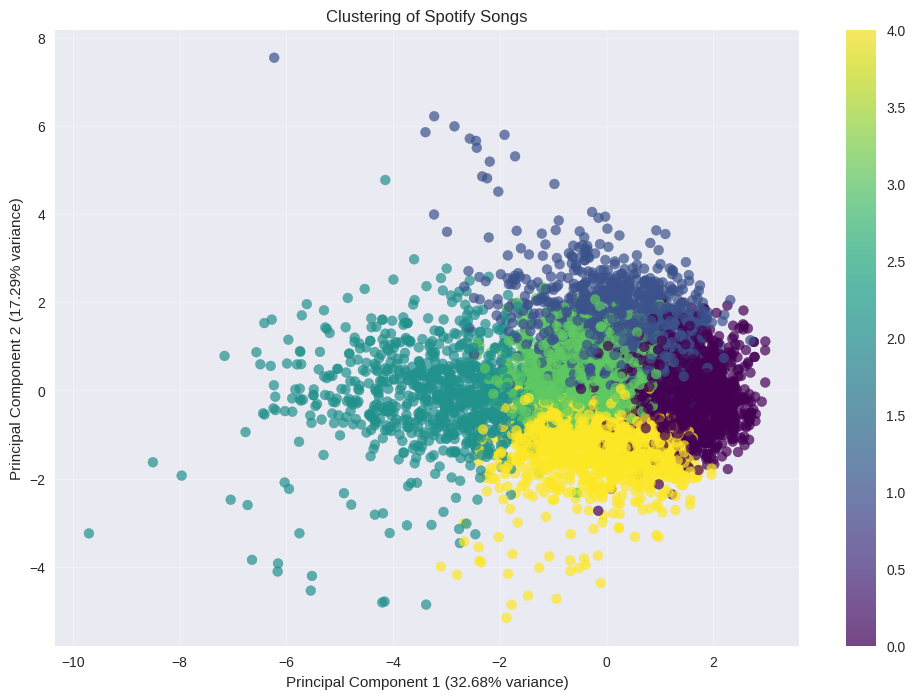

In [62]:
# Visualise our generated clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Title'] = df['Title'].values

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'],  cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()
plt.title('Clustering of Spotify Songs')
plt.grid(True, alpha=0.3)
plt.show()

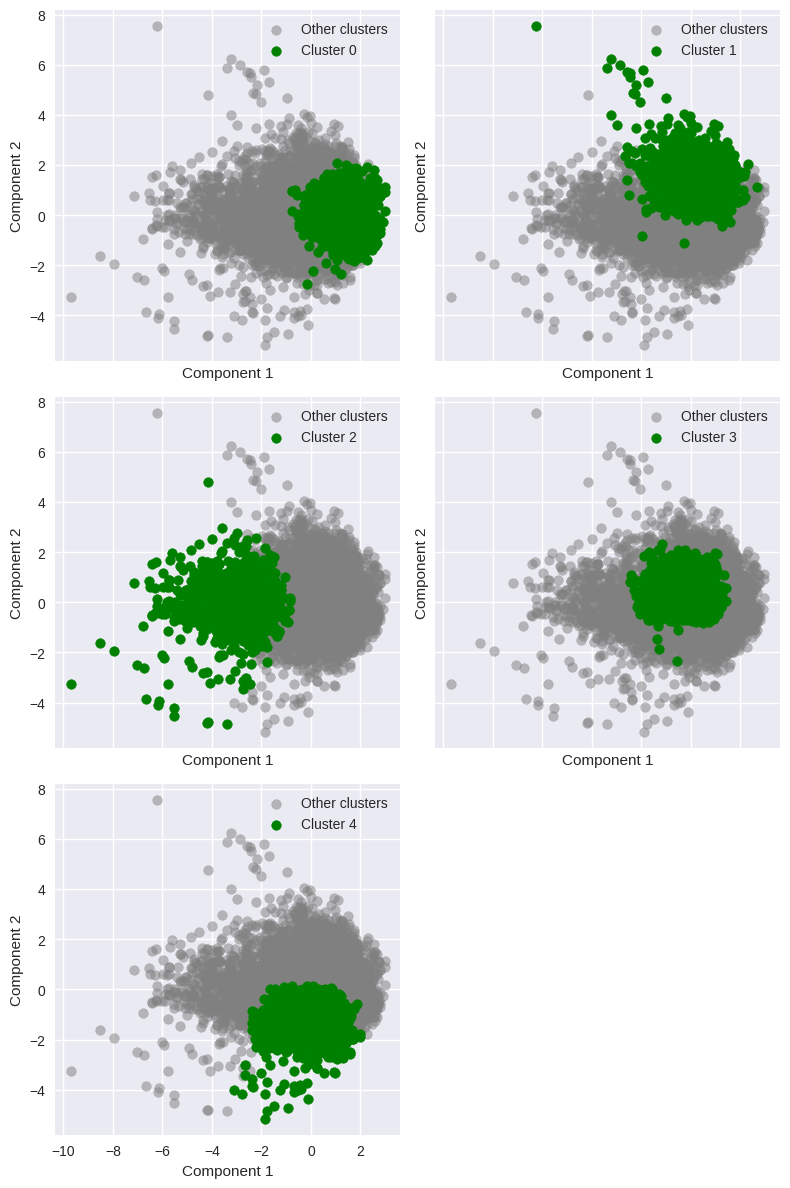

In [63]:
# Subplots for where each cluster is positioned
unique_clusters = np.unique(cluster_labels)
n_clusters = len(unique_clusters)

n_cols = 2
n_rows = (n_clusters + n_cols - 1) // n_cols 
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 4*n_rows), sharex=True, sharey=True)
axs = axs.flatten()

for i, cluster in enumerate(unique_clusters):
    df_cluster = X_pca[cluster_labels == cluster]
    df_other_clusters = X_pca[cluster_labels != cluster]
    axs[i].scatter(df_other_clusters[:, 0], df_other_clusters[:, 1], c='gray', label='Other clusters', alpha=0.5)
    axs[i].scatter(df_cluster[:, 0], df_cluster[:, 1], c='green', label='Cluster {}'.format(cluster))
    axs[i].set_xlabel('Component 1')
    axs[i].set_ylabel('Component 2')
    axs[i].legend()

for i in range(len(unique_clusters), len(axs)):
    axs[i].set_visible(False)
    
plt.tight_layout()
plt.show()


In [64]:
# Group the data by cluster and compute the mean of each numerical feature
cluster_means = df.groupby('Cluster')[numerical_features].mean()
print("Cluster Characteristics (mean values):")
print(cluster_means)

Cluster Characteristics (mean values):
         Danceability    Energy  Loudness_fixed  Speechiness  Acousticness  \
Cluster                                                                      
0            0.732773  0.762797       -3.947624     0.098039      0.168694   
1            0.726381  0.617069       -6.327220     0.347596      0.205987   
2            0.514408  0.357092       -9.807410     0.066656      0.717914   
3            0.768319  0.560744       -6.805319     0.097639      0.206637   
4            0.546057  0.700181       -4.920887     0.078261      0.120368   

         Instrumentalness   Valence  
Cluster                              
0                0.004350  0.708615  
1                0.002774  0.487959  
2                0.051330  0.334306  
3                0.006362  0.418647  
4                0.024241  0.330526  


In [65]:
def interpret_clusters(cluster_analysis):
    
    interpretations = []
    
    for cluster_id in cluster_analysis.index:
        features = cluster_analysis.loc[cluster_id]
        
        interpretation = f"Cluster {cluster_id}: "
        
        if features['Valence'] > 0.6 and features['Energy'] > 0.6:
            interpretation += "Happy_Upbeat"
        elif features['Valence'] < 0.5 and features['Energy'] < 0.5:
            interpretation += "Sad_Calm"
        elif features['Acousticness'] > 0.5:
            interpretation += "Acoustic_Relaxed"
        elif features['Danceability'] > 0.7:
            interpretation += "Danceable_Energetic"
        else:
            interpretation += "Mixed_Mood"
            
        interpretations.append(interpretation)
    
    return interpretations

In [66]:
print("\nCLUSTER INTERPRETATIONS:")
print("=" * 60)
interpretations = interpret_clusters(cluster_means)
for interpretation in interpretations:
    print(interpretation)


CLUSTER INTERPRETATIONS:
Cluster 0: Happy_Upbeat
Cluster 1: Danceable_Energetic
Cluster 2: Sad_Calm
Cluster 3: Danceable_Energetic
Cluster 4: Mixed_Mood


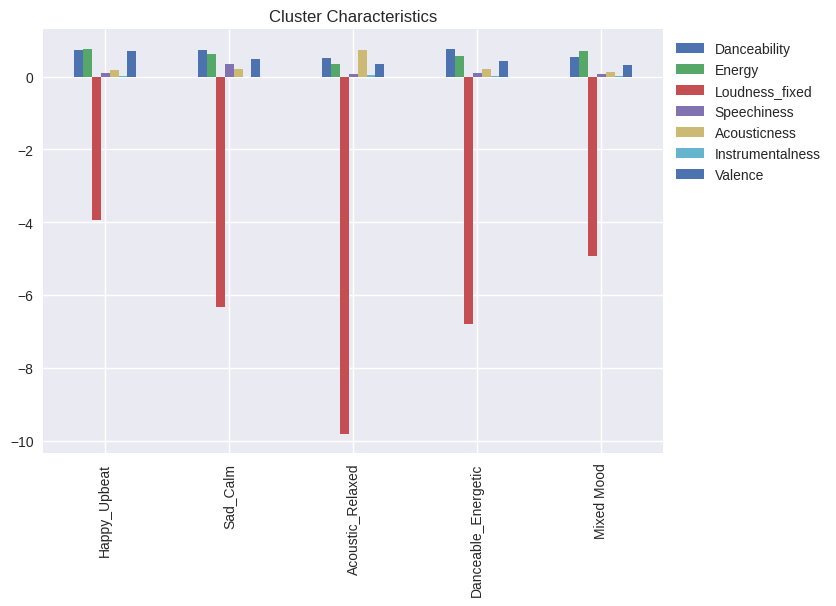

In [67]:
# Here, I create a plot of cluster means to help us compare clusters to each other
cluster_descriptions = {
        0: "Happy_Upbeat",
        1: "Sad_Calm", 
        2: "Acoustic_Relaxed",
        3: "Danceable_Energetic",
        4: "Mixed Mood"
}

cluster_means_renamed = cluster_means.copy()
cluster_means_renamed.index = [cluster_descriptions[i] for i in cluster_means.index]

cluster_means_renamed.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

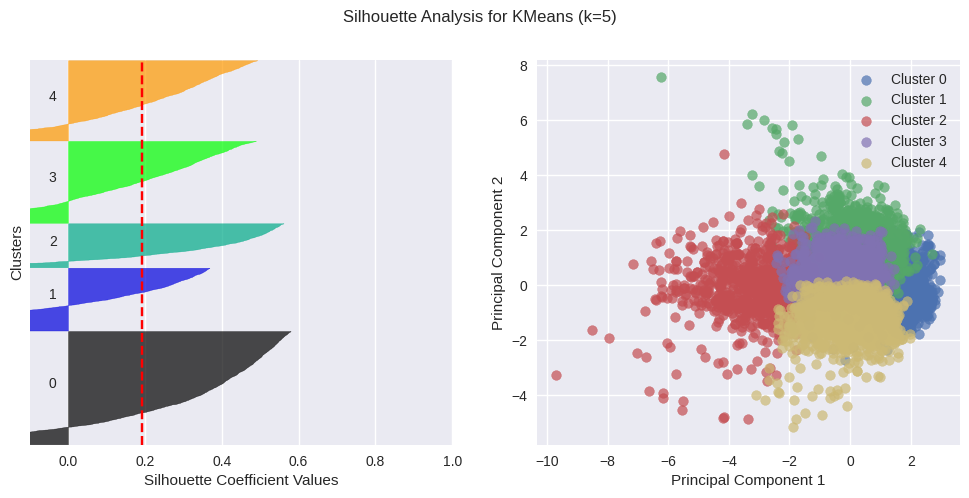

In [69]:
# Model Evaluation

# Analyse using Silhouette
def plot_silhouette_analysis(X, cluster_labels, n_clusters):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax1.set_xlabel('Silhouette Coefficient Values')
    ax1.set_ylabel('Clusters')
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        ax2.scatter(X[cluster_labels == cluster, 0], 
                   X[cluster_labels == cluster, 1], 
                   label=f'Cluster {cluster}', alpha=0.7)
    
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    ax2.legend()
    
    plt.suptitle(f'Silhouette Analysis for KMeans (k={n_clusters})')
    plt.show()

plot_silhouette_analysis(X_pca, cluster_labels, n_clusters=len(np.unique(cluster_labels)))

In [74]:
# Internal Evaluation Metrics
silhouette_avg = silhouette_score(X_pca, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

Silhouette Score: 0.193
Calinski-Harabasz Index: 3511.417
Davies-Bouldin Index: 1.238


In [77]:
# Song distribution overview
def assess_cluster_quality(X, cluster_labels):
    unique_clusters = np.unique(cluster_labels)
    
    print("Cluster Distribution:")
    for cluster in unique_clusters:
        cluster_size = np.sum(cluster_labels == cluster)
        percentage = (cluster_size / len(cluster_labels)) * 100
        print(f"Cluster {cluster}: {cluster_size} samples ({percentage:.1f}%)")
    
    print(f"\nTotal clusters: {len(unique_clusters)}")
    print(f"Total samples: {len(cluster_labels)}")
    
    min_cluster_size = min([np.sum(cluster_labels == cluster) for cluster in unique_clusters])
    print(f"Smallest cluster size: {min_cluster_size}")
    
    if min_cluster_size < 10:  
        print("Warning: Very small clusters detected!")

assess_cluster_quality(X_pca, cluster_labels)

Cluster Distribution:
Cluster 0: 2312 samples (29.6%)
Cluster 1: 1282 samples (16.4%)
Cluster 2: 898 samples (11.5%)
Cluster 3: 1671 samples (21.4%)
Cluster 4: 1638 samples (21.0%)

Total clusters: 5
Total samples: 7801
Smallest cluster size: 898


In [76]:
def analyse_each_cluster(df, numerical_features):
    
    print("DETAILED CLUSTER ANALYSIS")
    print("=" * 60)
    
    for cluster_id in sorted(df['Cluster'].unique()):
        cluster_songs = df[df['Cluster'] == cluster_id]
        
        print(f"\nCLUSTER {cluster_id} - {len(cluster_songs)} songs")
        print("-" * 40)
        
        print("Sample songs:")
        for title in cluster_songs['Title'].head(5):
            print(f"  • {title}")
    
        print("\nMusical Characteristics:")
        cluster_means = cluster_songs[numerical_features].mean()
        
        high_features = cluster_means.nlargest(3)
        print("  High in:", ", ".join([f"{feat}({val:.2f})" 
                                     for feat, val in high_features.items()]))
        
        low_features = cluster_means.nsmallest(3)
        print("  Low in:", ", ".join([f"{feat}({val:.2f})" 
                                    for feat, val in low_features.items()]))
  
        energy = cluster_means['Energy']
        valence = cluster_means['Valence']
        acousticness = cluster_means['Acousticness']
        danceability = cluster_means['Danceability']
        
        if valence > 0.6 and energy > 0.6:
            mood = "Happy_Upbeat"
        elif valence < 0.5 and energy < 0.5:
            mood = "Sad_Calm"
        elif acousticness > 0.5:
            mood = "Acoustic_Relaxed"
        elif danceability > 0.7:
            mood = "Danceable_Energetic"
        else:
            mood = "Mixed_Mood"
            
        print(f"Mood: {mood}")

analyse_each_cluster(df, numerical_features)

DETAILED CLUSTER ANALYSIS

CLUSTER 0 - 2312 songs
----------------------------------------
Sample songs:
  • Ella Baila Sola
  • Flowers
  • As It Was
  • Classy 101
  • TQM

Musical Characteristics:
  High in: Energy(0.76), Danceability(0.73), Valence(0.71)
  Low in: Loudness_fixed(-3.95), Instrumentalness(0.00), Speechiness(0.10)
Mood: Happy_Upbeat

CLUSTER 1 - 1282 songs
----------------------------------------
Sample songs:
  • La Bebe - Remix
  • TQG
  • All My Life (feat. J. Cole)
  • Starboy
  • Hey Mor

Musical Characteristics:
  High in: Danceability(0.73), Energy(0.62), Valence(0.49)
  Low in: Loudness_fixed(-6.33), Instrumentalness(0.00), Acousticness(0.21)
Mood: Danceable_Energetic

CLUSTER 2 - 898 songs
----------------------------------------
Sample songs:
  • Daylight
  • Acróstico
  • Say Yes To Heaven
  • Here With Me
  • People

Musical Characteristics:
  High in: Acousticness(0.72), Danceability(0.51), Energy(0.36)
  Low in: Loudness_fixed(-9.81), Instrumentalness(0.

In [73]:
def create_mood_playlists(df, cluster_descriptions=None):
    
    if cluster_descriptions is None:
        cluster_descriptions = {
            0: "Happy_Upbeat",
            1: "Sad_Calm", 
            2: "Acoustic_Relaxed",
            3: "Danceable_Energetic",
            4: "Mixed Mood",
        }
    
    for cluster_id in df['Cluster'].unique():
        cluster_songs = df[df['Cluster'] == cluster_id]
        mood_name = cluster_descriptions.get(cluster_id, f"Cluster_{cluster_id}")
        
        print(f"\n{mood_name} Playlist ({len(cluster_songs)} songs):")
        print("-" * 50)
        
        for _, song in cluster_songs.iterrows():
            print(f"{song['Title']} - {song['Artists']}")
        playlist_df = cluster_songs[['Title', 'Artists', 'Song URL']]
        playlist_df.to_csv(f'{mood_name}_playlist.csv', index=False)


create_mood_playlists(df)


Happy_Upbeat Playlist (2312 songs):
--------------------------------------------------
Ella Baila Sola - Eslabon Armado, Peso Pluma
Flowers - Miley Cyrus
As It Was - Harry Styles
Classy 101 - Feid, Young Miko
TQM - Fuerza Regida
Calm Down (with Selena Gomez) - Rema, Selena Gomez
El Azul - Junior H, Peso Pluma
Yandel 150 - Yandel, Feid
Boy's a Liar Pt. 2 - PinkPantheress, Ice Spice
PRC - Peso Pluma, Natanael Cano
I Ain't Worried - OneRepublic
Dance The Night (From Barbie The Album) - Dua Lipa
Moonlight - Kali Uchis
AMG - Natanael Cano, Peso Pluma, Gabito Ballesteros
La Bachata - Manuel Turizo
Shakira: Bzrp Music Sessions, Vol. 53 - Bizarrap, Shakira
Blank Space - Taylor Swift
Heat Waves - Glass Animals
Bones - Imagine Dragons
OMG - NewJeans
Left and Right (Feat. Jung Kook of BTS) - Charlie Puth, Jung Kook, BTS
El Gordo Trae El Mando - Chino Pacas
AMARGURA - KAROL G
Bye - Peso Pluma
Bite Me - ENHYPEN
El Merengue - Marshmello, Manuel Turizo
Sunflower - Spider-Man: Into the Spider-Verse -